In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore') #avoide unspected warnings

In [2]:
df = pd.read_csv('Rent prediction in dhaka.csv') #import google drive file which is dowloaded

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape #define number of row and colums

(3501, 2)

Text(0.5, 1.0, 'Rent prediction in dhaka.csv')

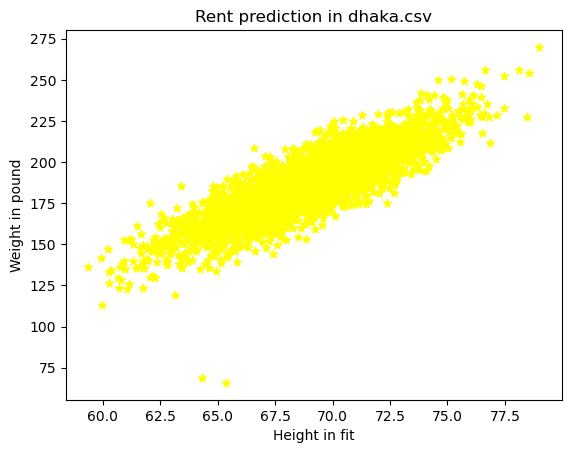

In [5]:
plt.scatter(df.Height ,df.Weight ,color='yellow' ,marker='*' )
plt.xlabel("Height in fit")
plt.ylabel("Weight in pound")
plt.title ('Rent prediction in dhaka.csv')

In [6]:
x = df.drop('Height', axis=1)
y = df[['Height']]

In [7]:
x.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [8]:
y.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [9]:
y.shape

(3501, 1)

In [10]:
x.mean()

Weight    186.891258
dtype: float64

In [11]:
y.mean()

Height    69.024411
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train ,test = train_test_split(df, test_size = .25)

In [14]:
train.shape

(2625, 2)

In [15]:
test.shape

(876, 2)

In [16]:
train.head()

,Height,Weight
2935,70.403673,188.594408
1127,70.566064,205.052685
2471,72.963161,204.181096
1586,66.276138,174.209764
2342,68.360072,176.413501


In [17]:
test.head()

,Height,Weight
1093,69.207100,172.775163
2919,70.358522,201.601812
2969,70.428474,199.144178
2113,67.362064,177.375008
2875,67.837986,192.368777


# Seperate

In [18]:
xtrain ,xtest,ytrain , ytest  = train_test_split(x,y ,test_size =.25 , random_state=0)

In [19]:
train.shape

(2625, 2)

In [20]:
test.shape

(876, 2)

In [21]:
xtrain.head()

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [22]:
ytrain.head()

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


# Linear Regression

In [23]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(xtrain, ytrain) #training the model

LinearRegression()

In [26]:
m =lr.coef_
m

array([[0.12231199]])

In [27]:
c=lr.intercept_
c

array([46.18035956])

In [28]:
yp=(m*73.847017)+c
yp

array([[55.21273481]])

In [29]:
yp=(m*68.721824)+c
yp

array([[54.58586228]])

In [30]:
lr.predict([[68.721824]])

array([[54.58586228]])

In [31]:
x.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [32]:
y.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [33]:
df['predicted_Height'] =lr.predict(x)
df.head()

,Height,Weight,predicted_Height
0,73.847017,241.893563,75.766841
1,68.781904,162.310473,66.032876
2,74.110105,212.740856,72.201116
3,71.730978,220.042470,73.094191
4,69.881796,206.349801,71.419413


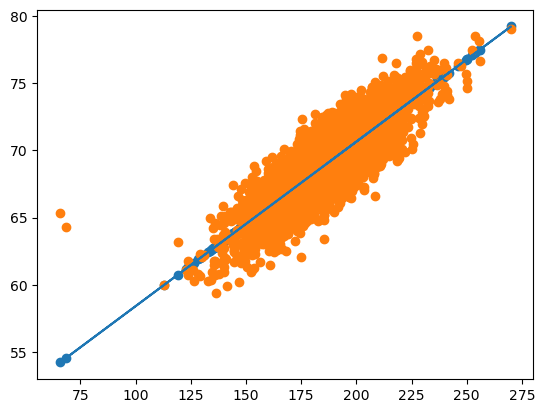

In [34]:
plt.plot(x, df[['predicted_Height']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['predicted_Height']])
plt.scatter(x, df[['Height']])

In [35]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [36]:
mse=mean_squared_error(ytest , lr.predict(xtest))
mae=mean_absolute_error(ytest, lr.predict(xtest))

In [37]:
mse #mse is allwas recived 

2.1809763340151576

In [38]:
mae

1.1944104872917285